# MNIST Fashion Dataset Application with Keras

This is a sample image classification tutorial with the MNIST fashion image dataset.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Your code to import tensorflow
# Your code to import Keras
# Your code to import numpy

import tensorflow as tf
from tensorflow import keras
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

print(tf.__version__)

2.13.1


## Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen below.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:




In [2]:
from IPython.display import display, Image
myImage = Image('fashion-mnist-sprite.png');
myImage

FileNotFoundError: No such file or directory: 'fashion-mnist-sprite.png'

FileNotFoundError: No such file or directory: 'fashion-mnist-sprite.png'

<IPython.core.display.Image object>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
# Your code to print the shape of the training images
print(train_images.shape)

(60000, 28, 28)


Likewise, there are 60,000 labels in the training set:

In [6]:
# Your code to print length of train labels
print(len(train_labels))

60000


Each label is an integer between 0 and 9:

In [7]:
# Your code to print the training labels
print(train_labels)

[9 0 0 ... 3 0 5]


There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
# Your code to print the shape of the test set images
print(test_images.shape)

(10000, 28, 28)


And the test set contains 10,000 images labels:

In [9]:
# Your code to print the length of the test labels
print(len(test_labels))

10000


## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

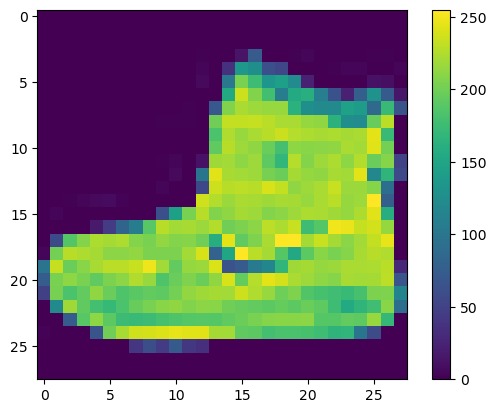

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

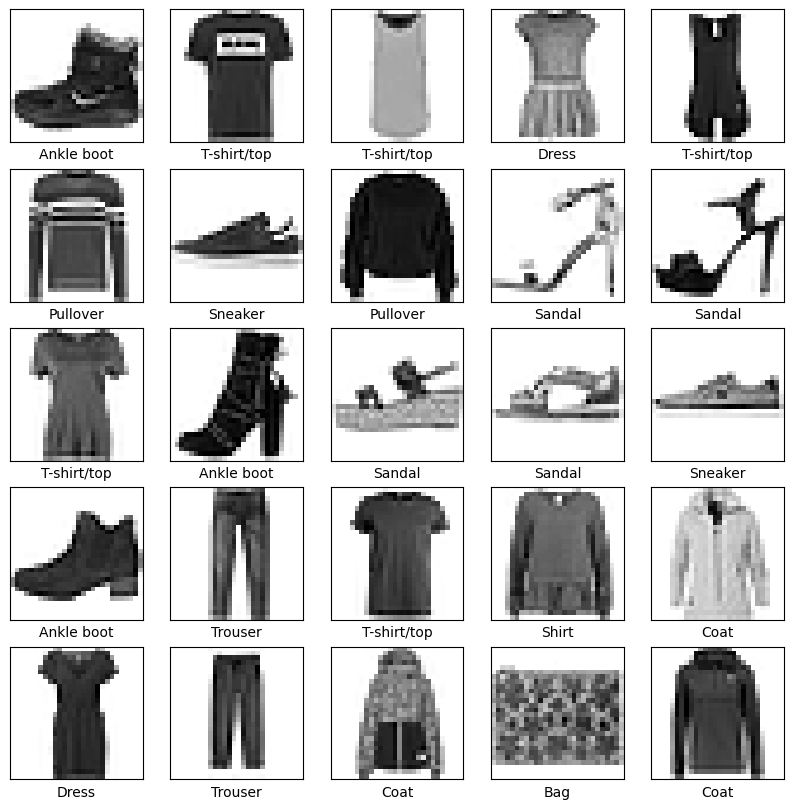

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

Develop a a neural network model of your choice i.e. number of layers and activation function. Remember the input is a 2-D so you need to flatten the input.

In [13]:
#
# Your code to build the neural network model.
# Use model.add.Flatten() layer as the first layer.
# Chose softmax in the output layer. Chose the number of layers and actication functions in hidden layers of your choice.
# Do not forget to set correct number of neurons in the output layer.
#

model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 80)                20080     
                                                                 
 dense_2 (Dense)             (None, 10)                810       
                                                                 
Total params: 217140 (848.20 KB)
Trainable params: 217140 (848.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


We have used 'adam' optimizer. Try other optimizer functions. Use Keras API as a reference  

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [15]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4770 - accuracy: 0.8291
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3586 - accuracy: 0.8686
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3234 - accuracy: 0.8809
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3009 - accuracy: 0.8878
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.8962
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2701 - accuracy: 0.8983
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9038
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9054
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2363 - accuracy: 0.9100
Epoch 10/100
1875/1875 [==============================] - 5s 2ms/step - l

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9755
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0554 - accuracy: 0.9796
Epoch 81/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9776
Epoch 82/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0560 - accuracy: 0.9793
Epoch 83/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9782
Epoch 84/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9782
Epoch 85/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9792
Epoch 86/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9795
Epoch 87/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9807
Epoch 88/100
1875/1875 [==============================] - 4s 2ms/step - loss:

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.0332 - accuracy: 0.8924 - 468ms/epoch - 1ms/step

Test accuracy: 0.8924000263214111


In [45]:
model.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 80)                20080     
                                                                 
 dense_2 (Dense)             (None, 10)                810       
                                                                 
Total params: 217140 (848.20 KB)
Trainable params: 217140 (848.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Make predictions

With the model trained, you can use it to make predictions about some images.

In [31]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [32]:
predictions[0]

array([5.7576388e-28, 4.2546435e-27, 5.8182618e-30, 3.5530530e-37,
       6.0208493e-35, 4.3870857e-21, 4.4282145e-20, 1.7426287e-12,
       1.0947180e-36, 1.0000000e+00], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [33]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [34]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

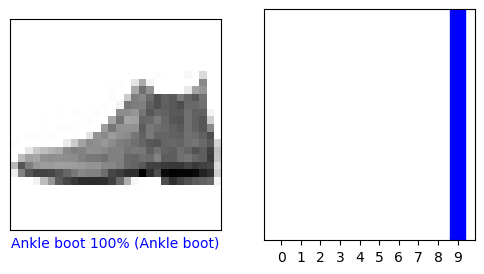

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot any other image

In [37]:
# Your code to plot any other image and confidense score of your choise

Let's plot several images with their predictions.
In the next cell, you need to plot first 15 images in the following format.

Use the sample code of the plots provided in this tutorial. Hint - You need to
use subplots, for loop, etc..

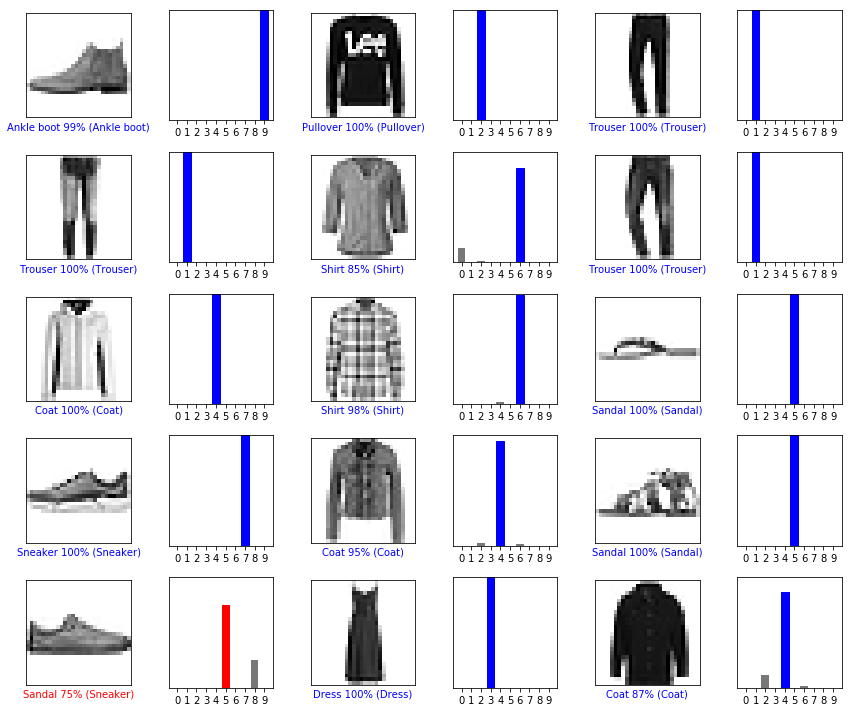



In [38]:
#
# Your code to plot first 15 predictions in the above format.
#

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [39]:
img = test_images[1]

# Your code to print the shape of the image

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [40]:
img = (np.expand_dims(img,0))

# Your code to print the shape of the image.

Now predict the correct label for this image:

In [41]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[2.6288698e-20 3.5449912e-33 1.0000000e+00 1.8117477e-22 1.0194702e-08
  1.2146563e-24 6.8497389e-13 7.6231444e-30 1.6293212e-29 0.0000000e+00]]


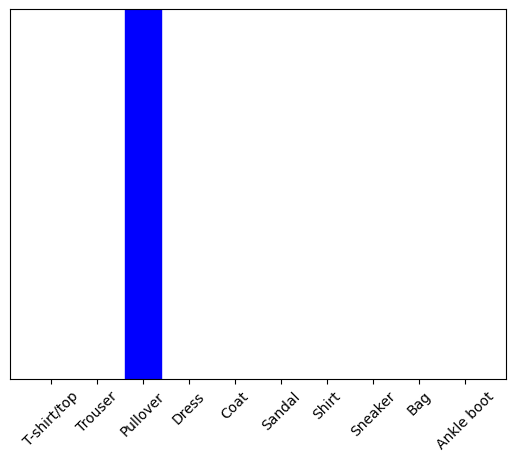

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [43]:
np.argmax(predictions_single[0])

2

# **Lab Logbook Requirement:**

# Please record the model's accuracy and a summary of its development. You can obtain the model summary using the model.summary() method. The API for obtaining the model summary is defined in the following link:

# https://keras.io/api/models/model/#summary-method

# Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.
